## 0. 목차

***

> 1. 전처리  
    1. 인구 데이터 전처리  
    2. 보건 데이터 전처리  
    3. 문화/스포츠 데이터 전처리  
    4. 상업 데이터 전처리  
    5. 교통 데이터 전처리  
    6. 부동산 데이터 전처리  

> 2. 분석  
    1. 기업 분석  
    2. 인프라 기준 분석  
    3. 준공 시기 전후 인구 데이터 분석  
    4. 인구 변화량과 시설, 교통, 부동산 간의 관계 분석   


## 1. 전처리
***

#### 1. **인구 데이터 전처리**

- **전처리 목적**  
  1. 기업 준공 시기 기준 전후 간 총인구 추출
  2. 기업 준공 시기 기준 전후 간 인구 비율 추출

- **전처리 대상 데이터**

<table>
    <tr>
        <th>출처</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td rowspan = 2>통계청</td>
        <td>행정구역(읍면동)별/5세별 주민등록인구(1992 ~ 2010)</td>
    </tr>
    <tr>
        <td>행정구역(읍면동)별/5세별 주민등록인구(2011 ~ )</td>
    </tr>
</table>
  

- **전처리 과정**
  1. 통계청에서 데이터 조건 설정 후 추출  
     데이터셋 1 년도별 / 지역 = '충주시','서산시','나주시'  
     데이터셋 2 년도별 / 지역 = '충주시','서산시','나주시'
     
  2. 데이터셋 확인
     * 데이터셋 1  
       불필요한 column '성별'  
       의미불명 column '80세 이상', '85세 이상' 존재
       
     * 데이터셋 2  
       불필요한 column '성별', '행정구역(시군구)별(1)'
        
  3. 데이터셋 정리
     * 데이터셋 1  
       column '성별', '80세 이상', '85세 이상' 삭제  
       column '행정구역(시군구)별' -> '행정구역' 명칭 변경  

     * 데이터셋 2
       column '성별', '행정구역(시군구)별(1)'삭제  
       column '행정구역(시군구)별(2)' -> '행정구역' 명칭 변경  

     * 데이터셋 1,2  
       column '행정구역' 을 인덱스로 설정  
       데이터셋 내 값의 타입을 int64로 변경  
       데이터셋에 10대 ~ 90대 index 추가와 값 삽입 (범주화)  
       기존 column '0 - 4세' ~ '95 * 99세' 삭제
       두 데이터셋 통합 '인구데이터' 생성
       
     * 인구데이터  
       지역, 시점별 나이 총합 > 총 인구 columns 생성  
       나이 범주화 column 삭제  
       '총인구' 데이터 생성

- **전처리 결과**
  
  * 인구데이터.head()  
  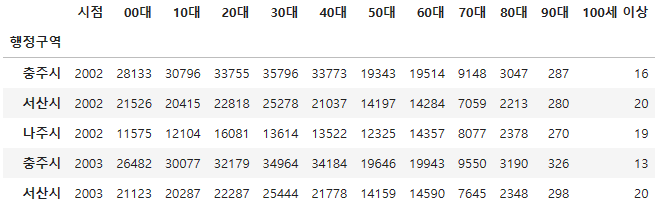

  * 총인구.head()  
  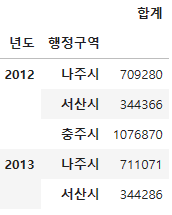


#### 2. **보건데이터 전처리**

- **전처리 목적**  
  1. 기업 준공 시기 기준 전후 간 사회복지시설, 보육시설, 의료기관 데이터 추출

- **전처리 대상 데이터**

<table>
    <tr>
        <th>출처</th>
        <th>종류</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td rowspan = 8>통계청</td>
        <td rowspan = 5>복지시설</td>
        <td>보육시설(2008)</td>
    </tr>
    <tr>
        <td>보육시설(2009-2020)</td>
    </tr>
    <tr>
        <td>사회복지시설(2002-2007)</td>
    </tr>
    <tr>
        <td>사회복지시설(2008)</td>
    </tr>
    <tr>
        <td>사회복지시설(2009-2020)</td>
    </tr>
    <td rowspan = 3>의료기관</td>
        <td>의료기관(2002-2007)</td>
    </tr>
    <tr>
        <td>의료기관(2008)</td>
    </tr>
    <tr>
        <td>의료기관(2009-2020)</td>
    </tr>
</table>
  

- **전처리 과정**
  1. 통계청에서 데이터 조건 설정 후 추출  
     데이터셋 년도별 / 지역 = '충주시','서산시','나주시'
     
  2. 데이터셋 확인
     * 년도별 데이터 확인  
       불필요한 값 '행정구역별(1)'
        
  3. 데이터셋 정리
     * 년도별 데이터셋 정리  
       1. columns '행정구역별(1)' 삭제  
       2. columns '년도' 명칭 추가
       3. DataFrame 전치
       4. columns 각 '개소','합계','소계','충주시','서산시','나주시' 명칭 변경
       5. '합계'columns를 통해 '합계'라고 적혀있는 행값과 '개소' columns의 '보육시설 (개)'만 추출
       6. 기존에 있던 '합계','소계' columns 삭제
       7. 추출한 Data를 csv 파일로 저장

     * 년도별 데이터 병합
       1. 각 년도별 데이터를 각 객체에 저장
       2. concat을 이용해 병합
       3. set_index를 이용하여 '년도'로 index로 재설정


- **전처리 결과**
  
  * 보육.head()  
    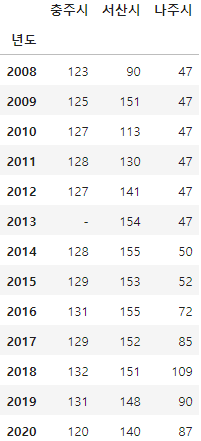

  * 의료기관.head()  
    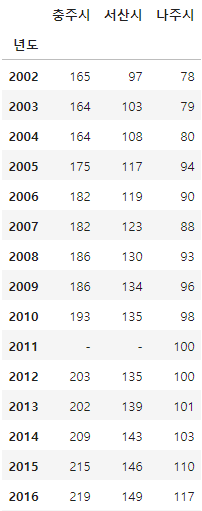a.png)

#### 3. **문화/스포츠 데이터 전처리**

- 전처리 목적


기업의 지방 이전 및 공장 준공이 해당 지역에 사회 기반 시설의 증가와 함께 인구 유입에 영향을 미칠 수 있는지를 확인하기 위하여 문화/스포츠 시설 수에 관한 데이터를 수집하고 추출

- 전처리 대상 데이터

|연번|출처|데이터셋|
|--|--|----------------|
|01|체육시설(2002년-2020년) | 연구 대상 도시(충주/서산/나주)의 공공/등록/신고 체육시설 수의 연도별 현황|
|02|문화공간(2002년-2007년) | 연구 대상 도시(충주/서산/나주)의 공연/전시 시설 수의 연도별 현황|
|03|문화공간(2008년) |연구 대상 도시(충주/서산/나주)의 영화관/미술관 시설 수의 2008년 현황|
|04|박물관(2008년) | 연구 대상 도시(충주/서산/나주)의 박물관 시설 수의 2008년 현황|
|05|박물관미술관(2009년-2022년) | 연구 대상 도시(충주/서산/나주)의 미술관/박물관 시설 수의 연도별 현황|
|06|공공도서관(2002년-2007년) | 연구 대상 도시(충주/서산/나주)의 공공도서관 시설 수 및 자료의 연도별 현황|
|07|공공도서관(2008년) | 연구 대상 도시(충주/서산/나주)의 공공도서관 시설 수 및 자료의 연도별 현황|
|08|공공도서관(2016년-2022년) | 연구 대상 도시(충주/서산/나주)의 공공도서관 시설 수 및 자료의 연도별 현황|
|09|공공도서관_충주 | 충주시의 공공도서관 시설 수 및 자료의 연도별 현황|
|10|공공도서관_서산 | 서산시의 공공도서관 시설 수 및 자료의 연도별 현황|
|11|공공도서관_나주 | 나주시의 공공도서관 시설 수 및 자료의 연도별 현황|

- 전처리 과정

##### 체육시설
    : 총 4개의 연도별 데이터셋 사용1. 데이터 탐색 및 추출
    - 국가통계포털(통계청)에서 데이터 조건 설정 후 추출
    - 데이터셋 연도별 = 2002~현재/ 지역 = '충주시','서산시','나주시'

2. 데이터셋 확인
   - 연도별 데이터에서 불필요한 값 확인
   - 불필요한 값 : 행정구역별, 소계, 구분, 시설타입 등

3. 데이터셋 정리
   - 연도별 데이터셋 정리
   - 불필요한 값 drop(columns=['행정구역별(1)', '행정구역별(2)', '행정구역별(3)'])
   - 컬럼명 방식 통일 rename(columns=lambda x: x.split('.')[0], inplace=True)
   - 인덱스 리네임 rename(index={3: '충주시', 4: '서산시', 5: '나주시'}, inplace=True)
   - 인덱스 추가 .set_index('Year', inplace=True)
   - 연도별 시설수 더하기 .loc['서산시', '2002'].replace('-', np.nan).astype(float).sum()
   - 도시별/연도별 컬럼 병합 concat([sum_cj1, sum_ss1, sum_nj1], axis=1) 추출한 도시별 데이터프레임 merge

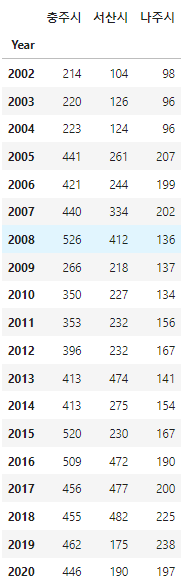

##### 문화시설
    : 총 4개의 연도별 데이터셋 사용
    
1. 국가통계포털(통계청)에서 데이터 조건 설정 후 추출
    - 데이터셋 연도별 = 2002~현재 / 지역 = '충주시','서산시','나주시'

2. 데이터셋 확인
   - 연도별 데이터에서 불필요한 값 확인
   - 불필요한 값 : 행정구역별, 소계, 구분, 시설타입 등

3. 데이터셋 정리
   - 연도별 데이터셋 정리
   - 컬럼명 리네임 rename(columns={'행정구역별(3)': '지역'}, inplace=True)
   - 불필요한 값 삭제 drop(columns=['행정구역별(1)', '행정구역별(2)'], axis=1, inplace=True)
   - 필요한 행 설정 loc[:, ~df1.iloc[0].isin(['미술관','박물관'])]
   - 컬럼명 서식 통일 rename(columns=lambda x: x.split('.')[0], inplace=True)
   - 필요 컬럼 추출 at[0, '2008'] = '박물관수'
   - 병합 .merge(df1_c, df2_c, on='지역', how='inner')
   - 최종 연도/시설별 concat([merged_sum, sum_df3], axis=1).astype(int)

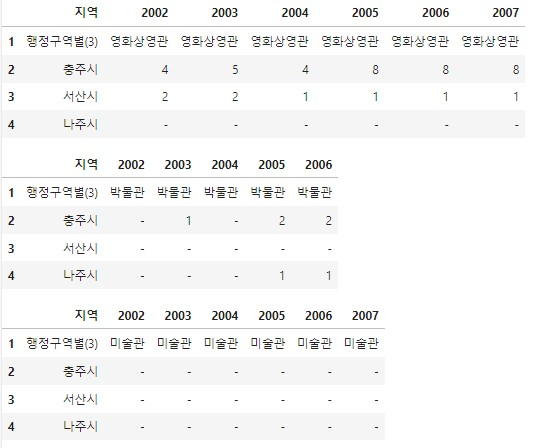  
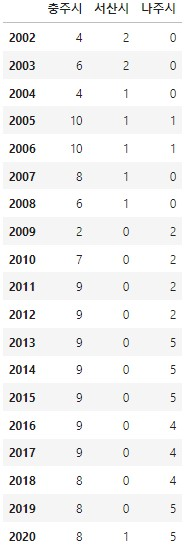

##### **<공공도서관>** : 총 6개의 연도별 데이터셋 사용

    1. 국가통계포털(통계청)에서 데이터 조건 설정 후 추출
        - 데이터셋 연도별 = 2002~현재 / 지역 = '충주시','서산시','나주시'

    2. 데이터셋 확인
       - 연도별 데이터에서 불필요한 값 확인
       - 불필요한 값 : 행정구역별, 소계, 구분, 시설타입 등

    3. 데이터셋 정리
       - 연도별 데이터셋 정리
       - 불필요한 값 삭제 drop(columns=['행정구역별(1)', '행정구역별(2)', '행정구역별(3)'], axis=1, inplace=True)
       - 컬럼 서식 통일 rename(columns=lambda x: x.split('.')[0], inplace=True)
       - 인덱스 재설정 rename(index={2: '충주시', 3: '서산시', 4: '나주시'}, inplace=True)
       - 필요 행 추출 df6.loc[:, df6.loc[0] == '도서관수 (개)']
       - 값 채우기 mer1.fillna(0, inplace=True)
       - 전치 mer1.transpose()
       - 병합 concat([df6, df5, df3, df2, df1, df4 ], axis=1) df4 ], axis=1)

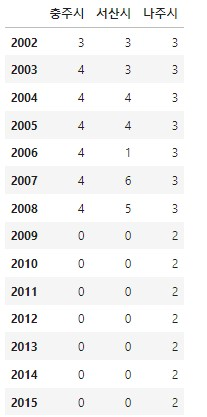

#### 4. **상업데이터 전처리**

- **전처리 목적**  
  1. 기업 준공 시기 기준 전후 간 숙박, 금융, 유통 데이터 추출

- **전처리 대상 데이터**

<table>
    <tr>
        <th>출처</th>
        <th>종류</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td rowspan = 13>통계청</td>
        <td rowspan = 7>유통</td>
        <td>식품위생관계업소(2002-2007)</td>
    </tr>
    <tr>
        <td>식품위생관계업소(2008)</td>
    </tr>
    <tr>
        <td>식품위생관계업소(2009-2020)</td>
    </tr>
    <tr>
        <td>유통업체(2005-2007)</td>
    </tr>
    <tr>
        <td>유통업체(2008)</td>
    </tr>
    <tr>
        <td>시장면적 및 근대적 유통시설 면적(2009-2020)</td>
    </tr>
    <tr>
        <td>시장분포(2002-2004)</td>
    </tr>
    <td rowspan = 4>숙박</td>
        <td>공중위생관계업소(2002)</td>
    </tr>
    <tr>
        <td>공중위생관계업소(2003-2007)</td>
    </tr>
    <tr>
        <td>공중위생관계업소(2008)</td>
    </tr>
    <tr>
        <td>호텔·관광숙박시설수(2013-2020)</td>
    </tr>
    <td rowspan = 2>금융</td>
        <td>금융기관(2002-2008)</td>
    </tr>
    <tr>
        <td>금융기관수(2009-2020)</td>
    </tr>
</table>
  

- **전처리 과정**
  1. 통계청에서 데이터 조건 설정 후 추출  
     데이터셋 년도별 / 지역 = '충주시','서산시','나주시'
     
  2. 데이터셋 확인
     * 년도별 데이터 확인  
       불필요한 값 '행정구  역별(1)'
        
  3. 데이터셋 정리
     * 년도별 데이터셋 정리  
       1. columns '행정구역별(1)' 삭제  
       2. columns '년도' 명칭 추가
       3. DataFrame 전치
       4. columns 각 '합계','소계','충주시','서산시','나주시' 명칭 변경
       5. '합계'columns를 통해 '합계'라고 적혀있는 행값만 추출
       6. 기존에 있던 '합계','소계' columns 삭제
       7. 추출한 Data를 csv 파일로 저장

     * 년도별 데이터 병합
       1. 각 년도별 데이터를 각 객체에 저장
       2. concat을 이용해 병합
       3. set_index를 이용하여 '년도'로 index로 재설정


- **전처리 결과**
  
  * 식품위생.head()   
  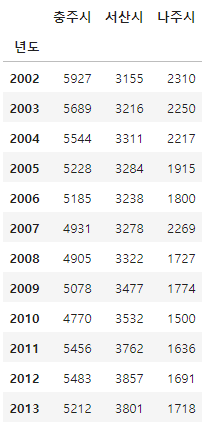

  * 금융기관.head()  
  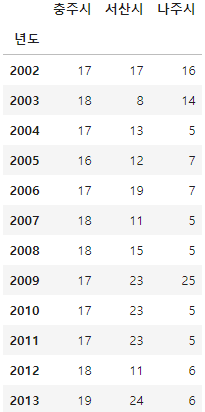

#### 5. **교통 데이터 전처리**

- **전처리 목적**  
  1. 인프라 정보에 포함되는 교통 데이터 확보

- **전처리 대상 데이터**

<table>
    <tr>
        <th>출처</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td>도로 및 보수 현황 시스템</td>
        <td>행정구역별 도로현황</td>
    </tr>
</table>
  

- **전처리 과정**

    1. 행정구역별 도로현황에서 최소년도(2012) ~ 최대년도(2022)의 지역(서산시, 충주시, 나주시) 추출, csv 작성
    
    2. 데이터셋 확인  
       header 값 존재하지 않음
       불필요한 column 존재
    
    3. 데이터셋 정리  
       header 값을 설정(년도 / 지역 / 종류 / 합계 / 포장 / 비포장 / 미개통 / 미개설도)  
       불필요한 column 포장, 비포장 미개통, 비개설도 삭제  
       column [년도, 지역, 종류] 를 multi_index 로 설정  
       column [년도, 지역] 을 그룹으로 그에 해당하는 모든 종류의 도로의 합 계산
       column [년도, 행정구역] 으로 multi_index 재설정
       '도로현황데이터' 데이터 생성
    

- **전처리 결과**  
  - 도로현황데이터.head()  
    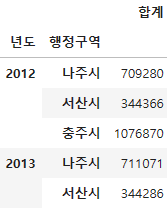

#### 6. **부동산 전처리**

- **전처리 목적**
1. 기업 준공 시기 기준 전후 간 주택보급률 증감 추이
2. 가구수에 따른 주택보급률 상관관계분석
3. 가구수/주택보급률에 따른 매매/전세 지수세 지수

- **전처리 대상 데이터**

<table>
    <tr>
        <th>출처</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td rowspan = 2>통계청</td>
        <td>도시별 주택현황/주택보급률 (2002 ~ 2020)</td>
    </tr>
    <tr>
        <td>도시별 주택현황/주택보급률 (2021)</td>
    </tr>
</table>

- **전처리 과정**
  1. 통계청에서 데이터 조건 설정 후 추출  
     데이터셋 1 년도별 / 지역 = '충주시','서산시','나주시'  
     데이터셋 2 년도별 / 지역 = '충주시','서산시','나주시'
     
  3. 데이터셋 확인
     * 데이터셋 1  
       불필요한 값 '행정구역(시군)별(1)', '행정구역(시군)별(1)')'  
       
     * 데이터셋 2  
       불필요한 값 '시군별(1)','시군별(1)
        
  4. 데이터셋 정리
     * 데이터셋 1  
       column index 확인 후 df_T로 전환  
       column '행정구역(시군구)별' -> 삭제  

     * 데이터셋 2
       column index 확인 후 df_T로 전환  
       column '행정구역(시군구)별' -> 삭제  

     * 데이터셋 1,2
       column '행정구역'삭제  
       인덱스 idx = list(dfT.index)로 확인
       인덱스값 변경 = '다세대주택(호)', '다가구주택(호)','단독주택','비거주용건물내주택(호)',
        '아파트(호)','연립주택(호)', '일반가구수(A)(가구)',
        '주택보급률(B)/(A)*100(%)', '주택수(B)(호) 항목으로 컬럼명 통합
       
       두 데이터셋 통합 '주택현황 및 주택보급률 ' 생성
       
     * 주택현황/주택보급률 데이터
       주택별(단독주택, 연립주택, 다가구주택, 아파트) 총합 및 주택 보급률 columns 생성      

- **전처리 결과**
  
  * 주택현황/주택보급률 데이터.head      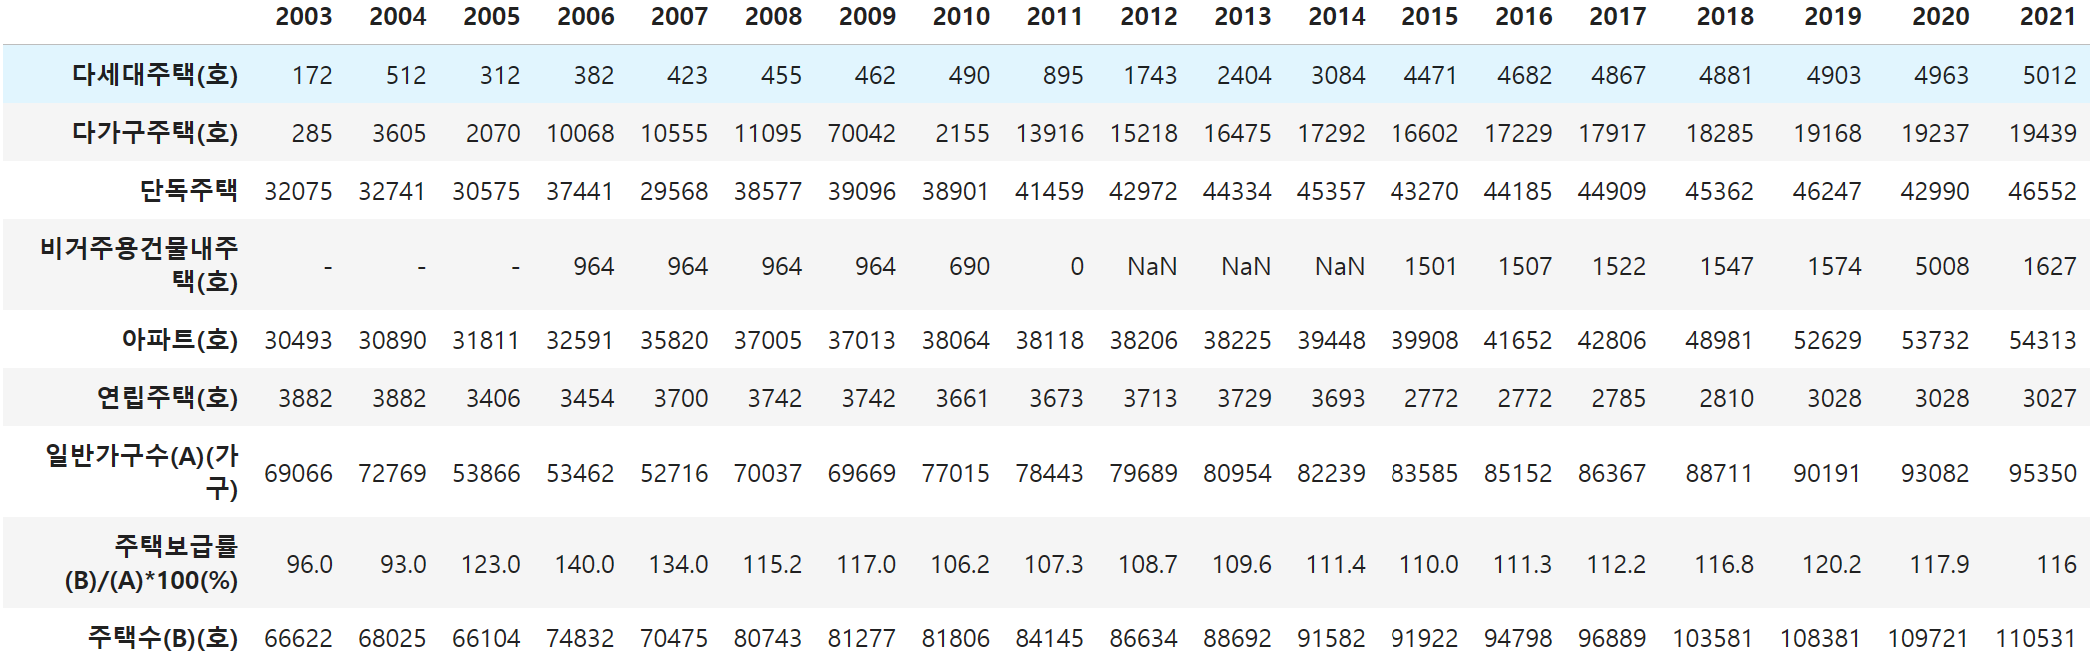
    

#### 7. **학교데이터 전처리**

- **전처리 목적**  
  1. 기업 준공 시기 기준 전후 간 학교데이터 추출

- **전처리 대상 데이터**

<table>
    <tr>
        <th>출처</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td rowspan = 3> 통계청 </td>
        <td>행정구역(읍면동)별/학교 개황(2002 ~ 2008)</td>        
    </tr>
    <tr>
        <td>행정구역(읍면동)별/학교 개황(2009)</td>        
    </tr>
    <tr>
        <td>행정구역(읍면동)별/학교 개황(2010~2022)</td>    
    </tr>
</table>

- **전처리 과정**
      
  1. 데이터셋 확인
     * 02~08년도  
       #school_db.columns == '2002'  
       #school_db.columns == '2003'  
       #보존할 열 인덱싱은  
       school_db.columns[2::27] 
       #슬라이싱 간격이 27마다 합계열 나온다.
       
     * 10~22년도  
       school_db2.columns[2::8]   
       #간격은 8
       
     * 09년도
       school_db3['2009']
       
     * 09년에서 10년으로 넘어갈때 충주같은경우 125개에서 61개.
       10~22 데이타가 부정확해 각 시 사이트 방문하여 통계연보를 통해 학교 수 기록 확인.
       충주시는 수치 확인하여 CSV 파일(메모장)에서 직접 입력.       
      
  2. 데이터셋 정리
     * 첫 열 삭제  
       school_db.drop(labels='행정구역별(1)', axis=1, inplace=True)
       
     * 슬라이싱싱으로 필요한 열 추출 후 concat으로 합치기  
       sc_right=school_db.iloc[:, 2::27]  
       sc_right  
       sc_left=school_db.iloc[:, 0:2]  
       sc_left  

- **전처리 결과**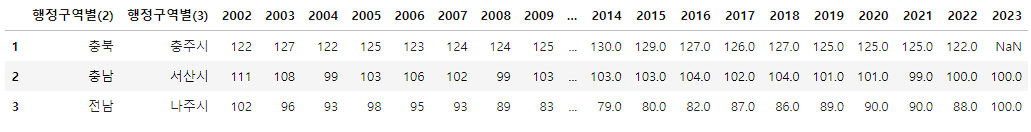1

## 2. 분석
***

#### **1. 기업 분석**

- **분석 목적**  
   프로젝트 목적에 알맞은 지표를 구하기 위하여 지방에 있으면서, 기업 규모가 큰 기업을 특정하기 위함

- **분석 사용 데이터**
  
|  출처  |    데이터셋    |
|--------|----------------|
|KRX 정보데이터 시스템|시가총액 상·하위 50종목 (상위)|

- **분석 과정**  

    1. top50 기업 리스트업
    2. 기업 리스트업이 가진 공장/지부/본사의 위치와 준공년도를 조사

|순위|   기업   |   위치   |   년도   |
|----|----------|----------|----------|
|01|삼성|구미|1980|
|02|SK하이닉스|청주|2007|
|03|LG에너지솔루션|청주|2004|
||
|48|에코프로머티|포항|2017|
|49|고려아연|울산|1995|
|50|한화오션|거제|1981|  

    3. 조건1 : 광역시, 수도권에 속하지 않을 것  
       조건2 : 2000년 이후일 것  
       조건3 : 비슷한 년도에 존재할 것
     
       위의 조건에 맞는 기업을 추출

- **분석 결과**
  
  |순위|기업|위치|년도|
  |---|---|---|---|
  |17|현대모비스|충주|2013|
  |27|한국전력|나주|2014|
  |37|SK이노베이션|서산|2012|

#### **2. 인프라 기준 분석**

- **분석 목적**  
  영향 판단 기준으로 삼을 인프라 수치를 정의하기 위함  

- **분석 사용 데이터**

  |정보출처|
  |--------|
  |국토지리정보원|
  |상권정보|


- **분석 과정**
    
  1. 인프라(infrastructure) 즉 기반시설으로 경제활동 또는 일상생활에 필요한 기반시설을 의미  
     교통, 교육, 의료, 문화, 복지를 모두 포함한 단어

  2. 상권정보에서 가르키는 상권으로는 음식, 예술/스포츠, 교육, 숙박, 보건, 서비스를 포함  
     이번 과정에서 인프라 정보로 실질적으로 영향을 끼치고 눈에 띄는 교통, 보건, 복지, 교육, 문화, 금융 을 선정

- **분석 결과**

<table>
    <th colspan = 6>선정한 인프라 정보</th>
    <tr>
        <td>교통</td>
        <td>보건</td>
        <td>복지</td>
        <td>교육</td>
        <td>문화</td>
        <td>금융</td>
    </tr>

</table>

#### **3. 준공 시기 전후 인구 데이터 분석**

- **분석 목적**  
   기업이 지역에 위치한 시기를 기준으로 이전과 이후의 인구를 비교하여 영향이 있는지를 확인

- **분석 사용 데이터**

  |사용 데이터|
  |---|
  |총인구|
  |인구데이터|
  |선정기업|

- **분석 과정**

  - 인구비율과 기업 준공 시기 분석
    1. 인구데이터의 범주화 재구성 10년단위 > 20년단위
    2. 인구데이터의 지역별 데이터 추출
    3. 지역별 데이터의 시점 데이터 추출
    4. 시점데이터를 선 그래프로 표현
    5. 그래프에 기업 준공 시기를 가르키는 수직선 삽입

  - 총 인구와 기업 준공 시기 분석
    1. 총 인구 데이터의 지역별 데이터 추출
    2. 지역별 데이터의 시점 데이터 추출
    3. 시점 데이터의 index 년도 추출
    4. 시점 데이터의 column 인구 값 추출
    5. 인구 와 년도로 막대 그래프 표현
    6. 그래프에 기업 준공 시기를 가르키는 수직선 삽입 

- **분석 결과**
  - 인구비율&기업준공시기
    - 충주시  
    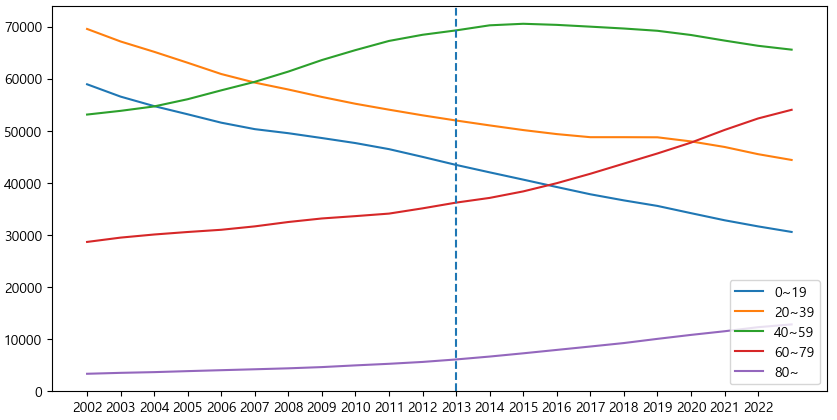
    
    2013년 현대모비스가 들어온 이전과 이후를 비교했을 때, 변화하는 방향성과 변화폭이 유사하다.  
    특히 60~79세의 증가량이 높은 것으로 보아 경제 인구 비율이 감소하는 것으로 보인다.  
    현대모비스가 들어온 것이 인구 비율에 끼치는 영향은 없다는 것을 확인할 수 있다.  

    - 서산시  
    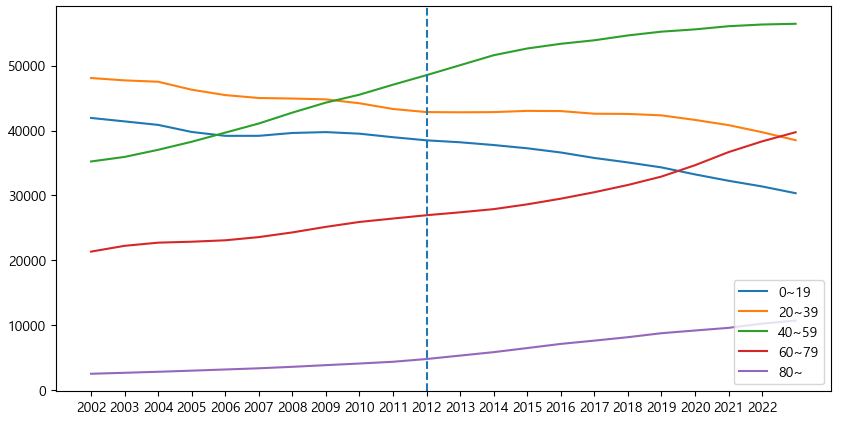

    2012년 SK이노베이션이 들어온 시기를 기준으로 2018년도까지는 변화량이 크지 않으며,  
    18년도 이후 변화량이 눈에 보인다.  
    2018년 이후 청년층의 감소폭이 늘어나며, 중·장년층이 늘어나는 것이 확인된다.  
    2018년까지는 SK이노베이션의 영향이 작용했다고 볼 수 있다.

    - 나주시  
    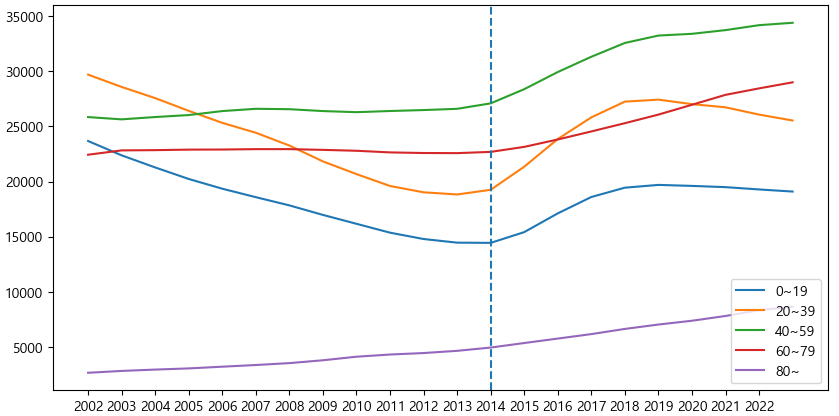

    2014년 한국전력이 들어온 시기를 기준으로 2018년 급격한 변화가 확인된다.  
    청년층이 감소하던 2014년 이전에 비해 급격하게 늘어나는 경향을 보인다.  
  

  - 총인구&기업준공시기
    - 충주시  
    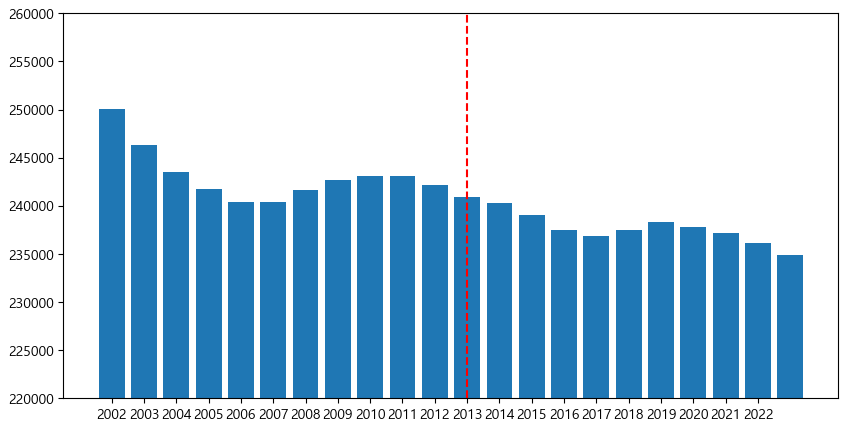

    2013년 현대모비스가 들어온 시기를 기준 인구 감소폭이 비교적 크다.  
    하지만, 2010년 이후 꾸준히 감소하는 추세를 계속해서 보이는 것으로 보아  
    현대모비스로 인한 영향은 없는 것으로 보인다.

    - 서산시  
    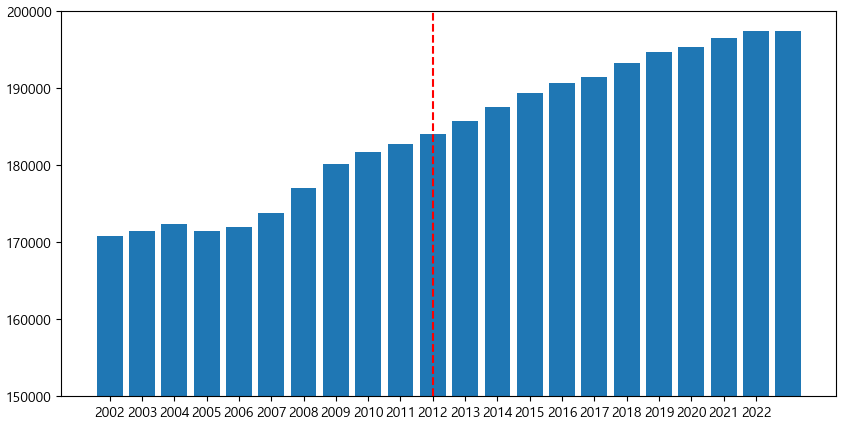

    2012년 SK이노베이션이 들어온 시기 이전에도 인구는 증가하고 있었으며, 이후에도 증가폭은 유사하다.  
    이를 보아 SK이노베이션이 인구에 큰 영향을 주었다고는 보기 어렵다.

    - 나주시  
    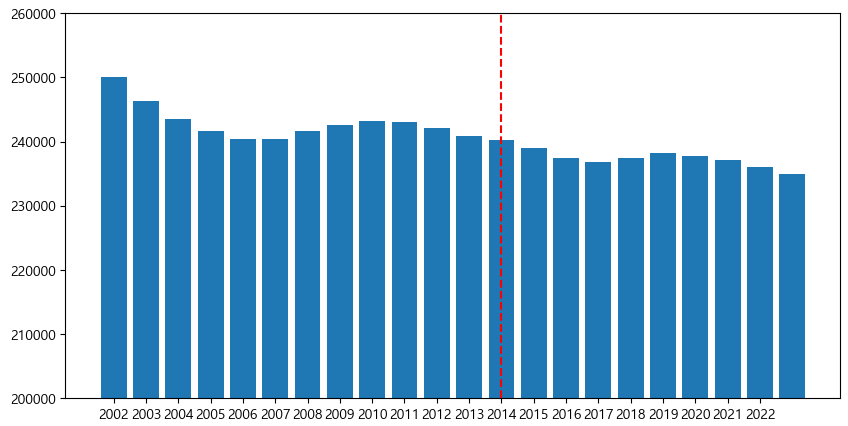

    2014년 한국전력이 들어온 시기를 기준으로 보았을 때, 인구 감소폭에 큰 변화가 없는 것으로 확인된다.  


  - 인구 최종 분석
    - 충주시
      이전과 이후가 동일하게 청년층이 감소하고, 중·장년층이 늘어나며 인구도 감소한다.  
      현대모비스 준공으로 인한 영향은 보이지 않는다.  
    - 서산시
      2018년도까지 인구비율이 어느정도 유지되나 이후 중·장년층이 늘어난다.
      총 인구는 늘어나는 기세로 꾸준한 것을 볼 때, SK이노베이션의 인구비율에 비해 인구에 대한 영향은 적다.
    - 나주시
      2018년도까지 청년층의 비율이 급격하게 커지는 것에 비해 인구는 계속해서 감소한다.  
      한국전력이 청년층을 유도하기는 했으나 총 인구까지 영향을 끼치지는 못한 것으로 보인다. 


#### **4. 인구 변화량과, 시설, 교통, 부동산 과의 관계 분석**

##### **1. 인구 - 시설 데이터 분석**

 - **분석 목적**  
  지역 인구수의 변화량과 사회기반시설 수의 변화량을 최근 20년 간의 지표를 통하여 확인하고, 기업의 지방 이전 및 공장 준공과의 관련성 여부를 확인하고자 한다.  
  본 분석에서 시설은 다음과 같이 한정한다.
   - 문화시설 : 영화관, 박물관, 미술관
   - 체육시설 : 공공체육시설(종합경기장, 실내체육관 등), 등록체육시설(골프장, 스키장 등), 신고체육시설(민간체육시설)
   - 도서관 : 공공도서관

- **분석 대상 데이터**

  |정보출처|
  |--------|
  |통계청|
  |지자체 홈페이지|


- **분석 과정**

  - 지역의 기업 유치 전후 문화/스포츠 시설 수와 인구 변화량 분석
    1. 문화/스포츠/공공도서관 시설데이터의 지역별 데이터 추출
    2. 지역별 데이터의 연도별 시설 수 수치 데이터 추출
    3. 시설별 수치 변화를 선 그래프로 표현
    4. 시설별 수치 변화 그래프를 인구 데이터와 비교 분석

- **분석 결과**
    - 도시/시기별 문화시설수 변화 추이  
      
      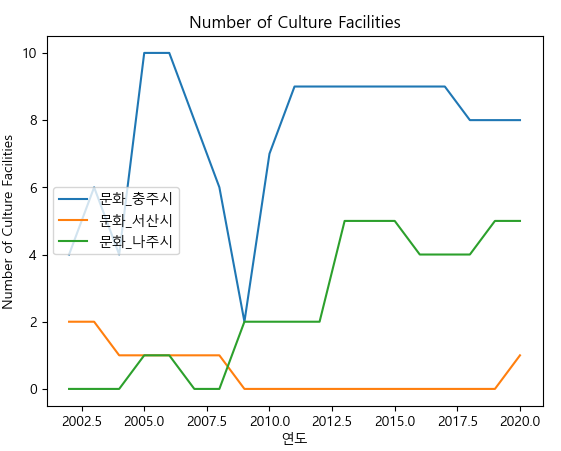  
연구 대상 도시별 문화시설 수에서 충주시는 인구수 증감과 비교하여 뚜렷한 변화 추이를 파악하기 어렵다. 다만, 2000년대 후반 급격한 하락하였다가 다시 반등한 것으로 미루어 보아, 당시 금융위기와 겹쳐 사회적 이슈로 인한 일시적인 현상이었을 것으로 추측된다. 서산시의 경우 2002년부터 2020년에 이르기까지 문화시설수가 2개에서 1개를 오가며 변화하고 있으며, 인구 변화량과 비교하였을 때 비슷한 변화 추이를 보이고 있다. 반면, 앞의 두 사례와는 달리 나주시의 경우 2002년 0개의 문화시설에서 20여년 간 꾸준히 상승세를 보여주며 현재 5개까지 늘어났음을 알 수 있다. 또한 나주시의 총인구수 역시 상승하는 추세로 인구 증가의 영향이라고 추측해 볼 수 있다.

    - 도시/시기별 스포츠 시설 변화 추이  
      
   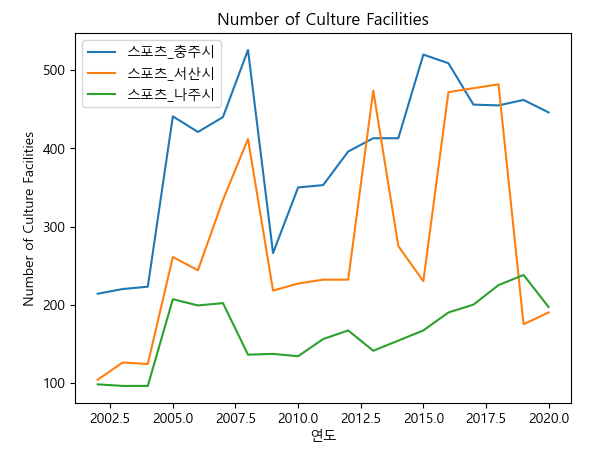
   
앞서 살펴본 문화시설과는 달리 충주시, 서산시, 나주시 모두 장기간에 걸쳐 꾸준히 시설수가 증가하였음을 알 수 있다. 나주시의 경우, 다른 두 도시와는 달리 완만한 상승곡선을 그리고 있으며, 충주시와 서산시 모두 2000년대 중후반 급격히 하락하는 시기가 있었으나 곧 원래 수치를 회복하였음을 알 수 있다. 그러나 서산시의 경우 시설 수치 수준을 어느정도 유지하고 있는 충주시와 달리 2010년대 후반 급격히 하락하였고 2020년 기준으로 세 도시 중 가장 적은 체육시설을 보유하고 있음을 알 수 있다. 체육시설의 경우, 전반적으로 건강과 운동에 대한 관심이 높아지며 인구 증가 혹은 감소에 영향을 상대적으로 덜 받는 것으로 추측된다.


    - 도시/시기별 공공도서관 시설 변화 추이  
        
   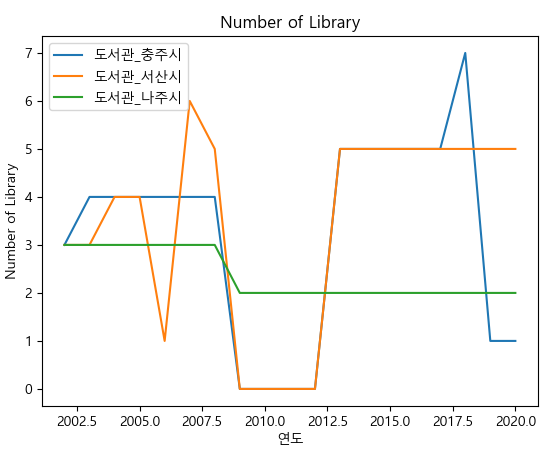  
  공공도서관의 경우 문화 또는 체육시설과는 달리 충주시와 나주시의 도시에서 모두 일정한 추이를 읽을 수 없는 결과가 발견되었다. 2000년대 중후반 세 도시 중 서산의 공공도서관 수가 가장 높았으나, 2010년대에 급격히 줄어들었다가 다시 원래의 수준으로 돌아와 유지하고 있음을 알 수 있으며, 충주시의 경우 2010년대에 7개까지 시설 수가 증가하였으나 점점 감소하여 현재 세 도시 중 가장 적은 공공도서관을 보유하고 있다. 한편, 나주시의 경우 3개에서 2개로 공공도서관 시설이 감소하였으나 2002년부터 2020년에 이르기까지 소폭 상승과 감소를 유지하고 있다. 따라서 인구수 증감에 따른 변화가 공공도서관 수에 미치는 영향은 적었을 것으로 추측된다. 

##### **2. 인구 - 교통 데이터 분석**

- **분석 목적**  
   인구와 교통의 단순 상관관계 확인하기 위해

- **분석 과정**
1. 인구 데이터와 교통(도로)데이터 병합  
2. 시각화를 통한 상관관계 유추  
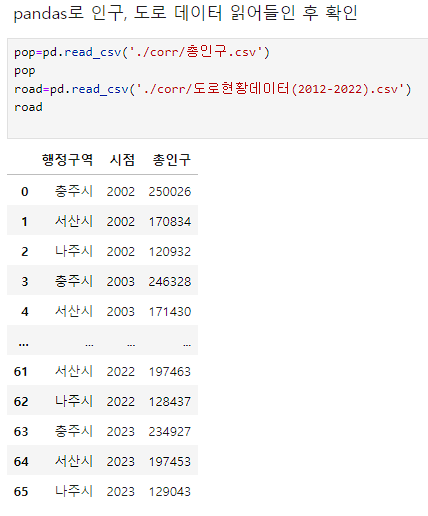  
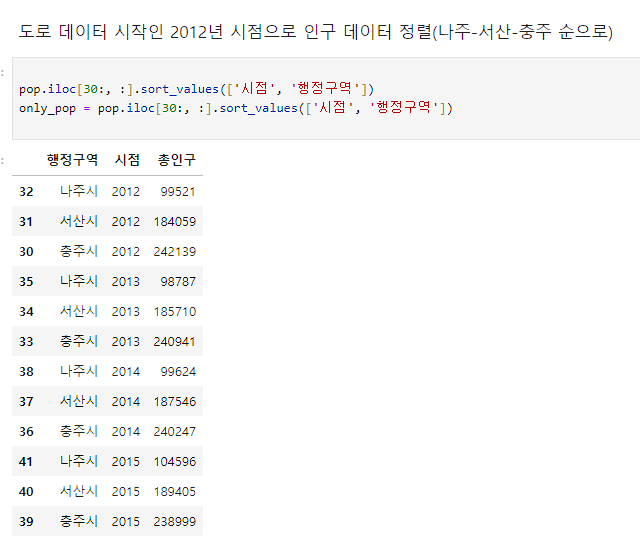  
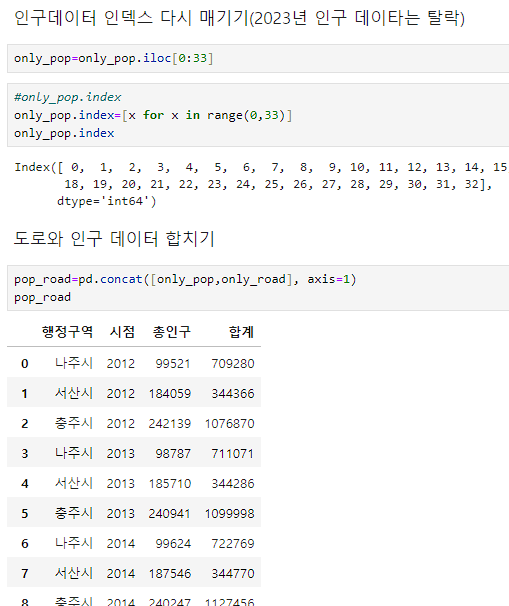  
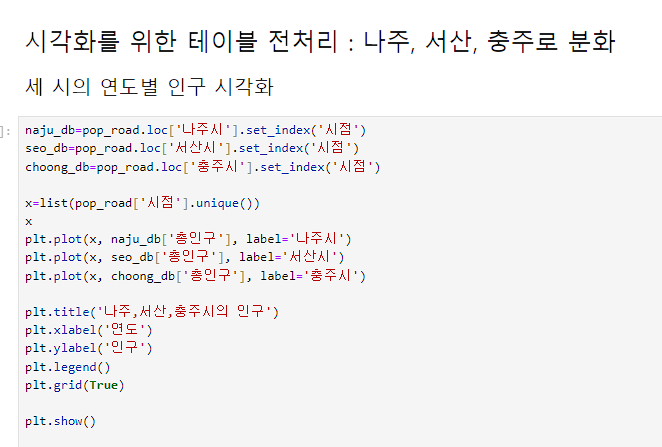  
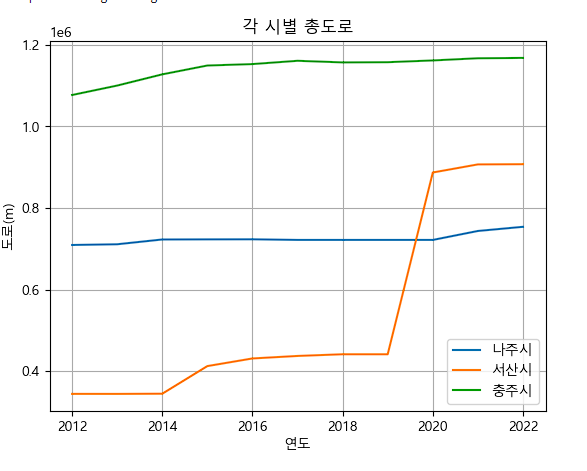  

- 분석 결과

 도로와 인구는 큰 상관관계가 보이지 않는  다.
다만 교통이란 인프라를 '총 도로 길이'란 아주 거친 지표로 나타내었기 때문에 전공 지식이 있다면 더 적확한 분석 방법론을 적용할 수 있었을 것이라 생각한

  

##### **3. 인구 - 부동산 데이터 분석**

- **분석 목적**  
   특정 지역의 유형별 가격 추세를 분석하여 부동산 가격의 변동성을 예측하고 이와 관련하여 주택보급률, 주택 공급 관계를 파악  
   가구수와 주택보급률 데이터를 분석하여 인구 변화나 가구 구성 변화의 상관관계 파악  .

- **분석 사용 데이터**

<table>
        <tr>
        <th>출처</th>
        <th>데이터셋</th>
    </tr>
    <tr>
        <td rowspan = 4>통계청, 공공데이터포탈</td>
        <td>주택별 매매/전세 지수  (2012 ~ 2022)</td>
    </tr>
    <tr>
        <td>도시별 주택현황/주택보급률 (2002 ~ 2020)</td>  
    </tr>
    <tr>
        <td>총 인구수 현황 (2002~2022)</td>
    </tr>
</ttable>

- **분석 과정**  
  - 부동산의 가격
    1. 나주시/충주시/서산시 주택 유형별 매매/전세 지수 조사
    2. 주택현황 및 주택보급률 조사
    3. 조건1 : 대기업이 이전한 지역 기준  
       조건2 : 공통데이터 기준(2012년~)      
       위의 조건에 맞는 도시별 매매/전세 지수 추출
  - 가구 수·주택보급률
    1. 인프라와 거주시설은 도시 및 지역에서 인간/경제 생활을 지원하기 위해 서로 보완적인 역할
    2. 나주시/충주시/서산시 총 인구현황 조사
    3. 조건1 : 대기업이 이전한 지역 기준  
       조건2 : 공통데이터 기준(2002년~2022년)  
       위의 조건에 맞는 인구 총 조사 지표/주택현황 및 주택보급률 지표 추출

- **분석 결과**
  - 부동산 가격  
    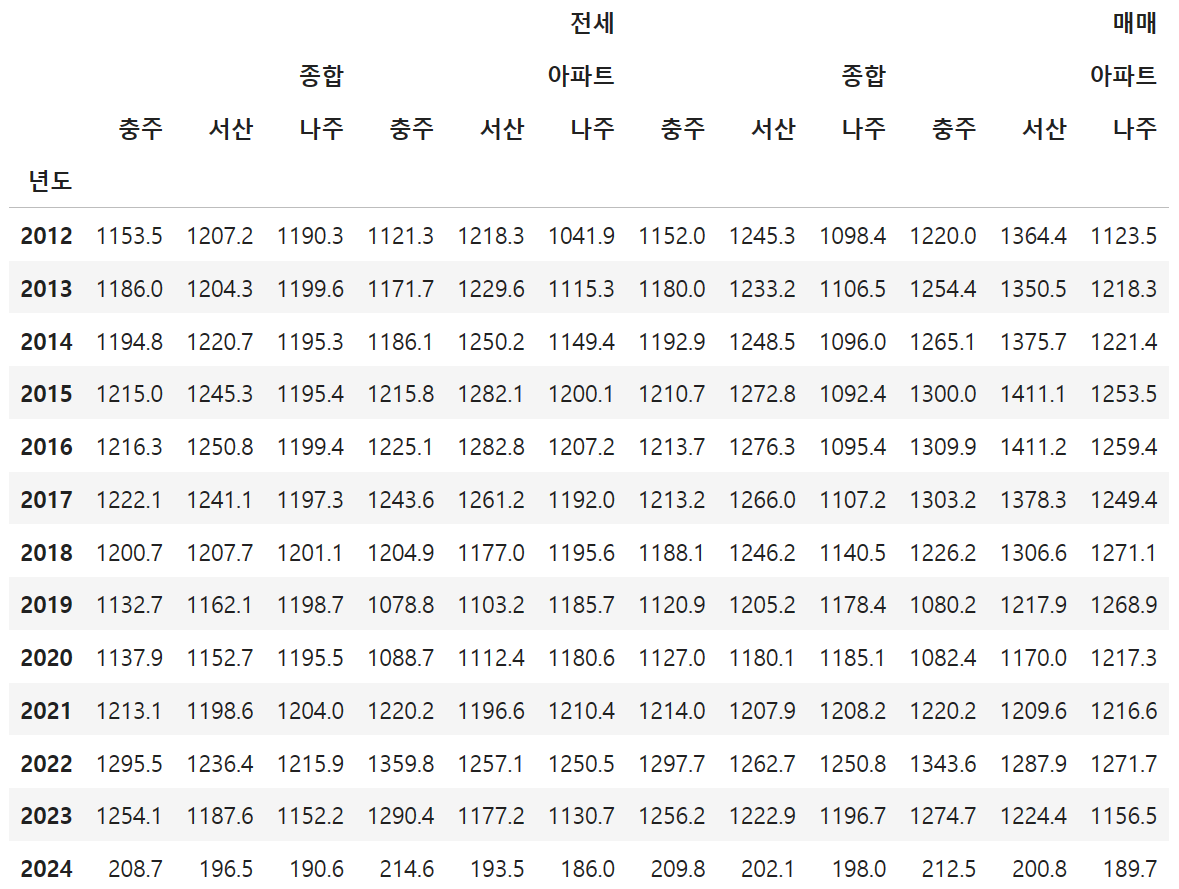
    
  - 충주시 전세/매매 지수  
    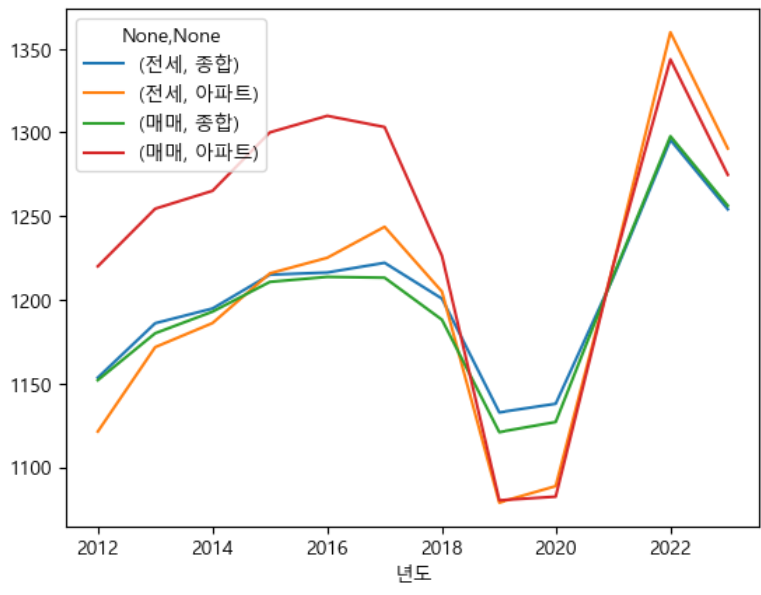

  - 나주시 전세/매매 지수  
    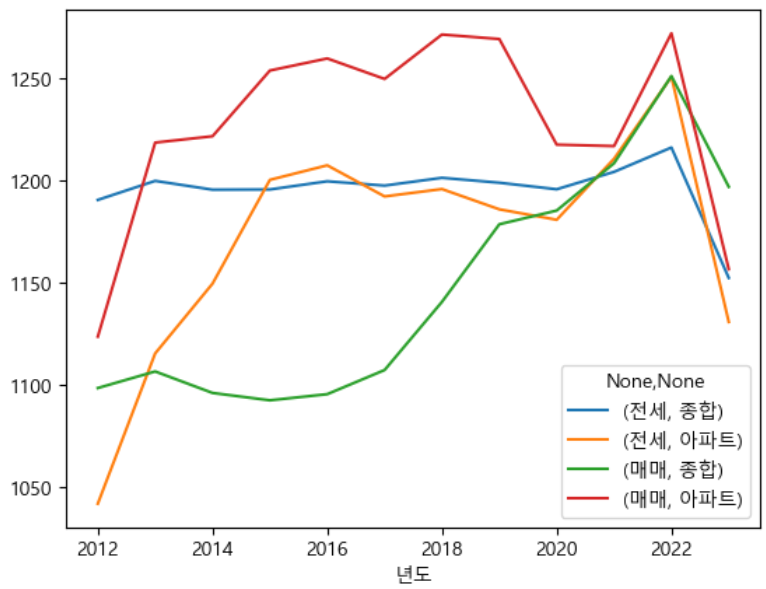

  - 서산시 전세/매매 지수  
    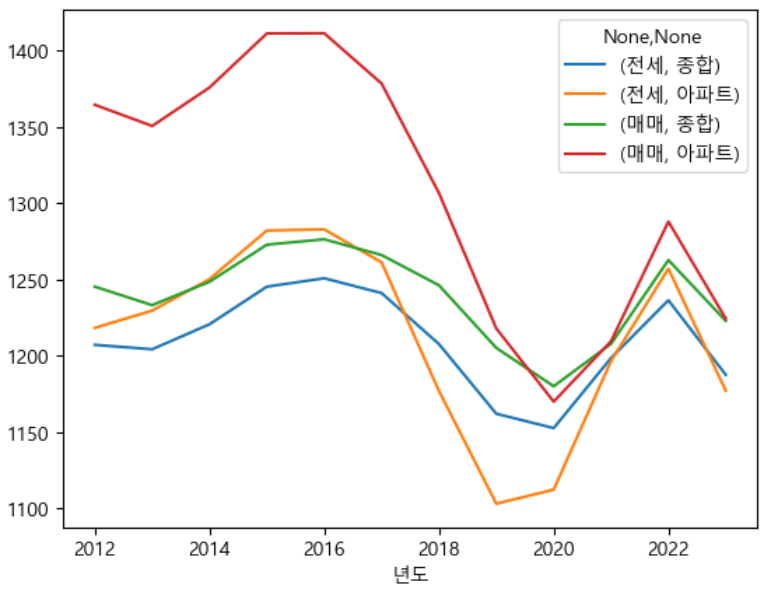
    
  - **결론1 도출**
    기업의 지방 이전 시점(2012 ~ 2014년)을 기준으로 했을 때, 2012년 ~ 2016년까지 높은 지수를 기록한 것으로 확인됨.      나주시의 경우 종합주택(단독,연릭,다세대 주택 등)의 종합주택 지수가 떨여졌으나, 전체적인 아파트 매매 지수가 상승했음.  
    기업이전의 영향과 더불어 다른 요인이 있을거라 추측됨.


  - 충주시 분석 결과     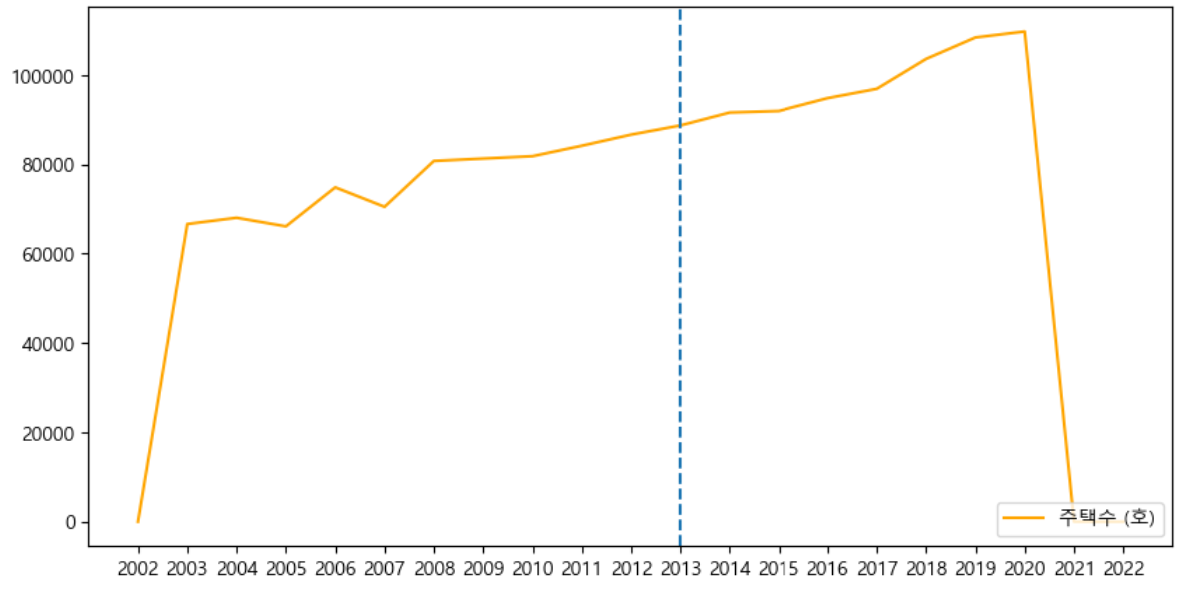
    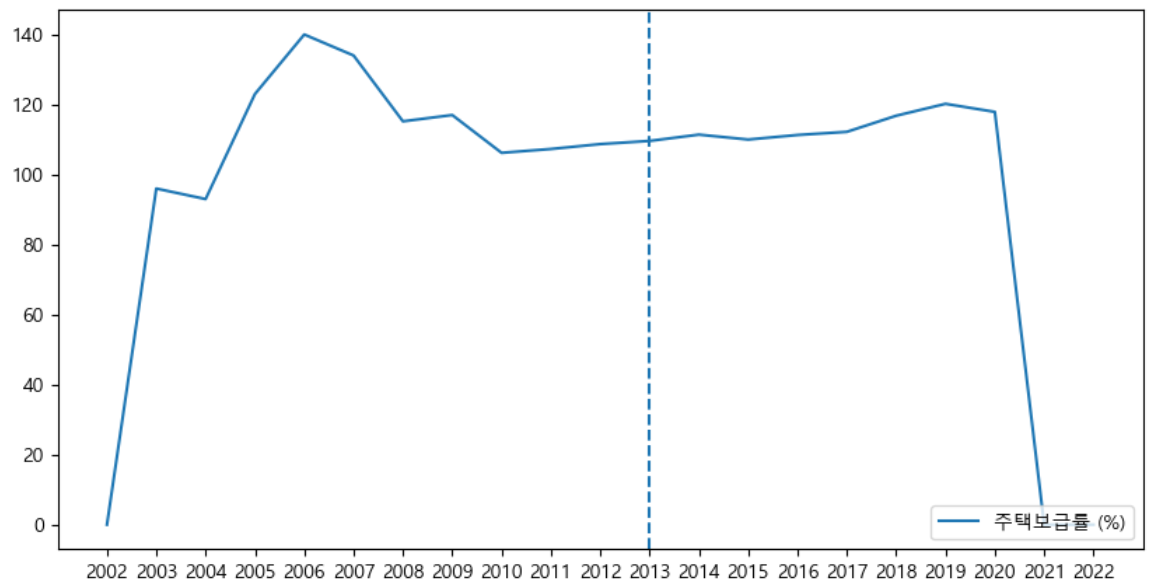 


  - 서산시 분석 결과     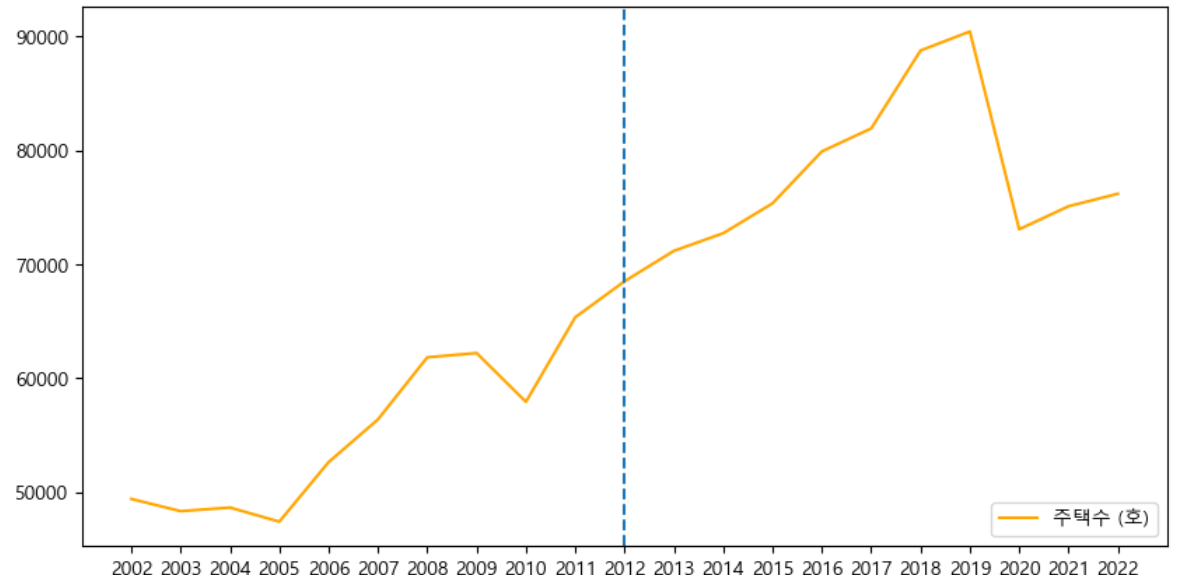
    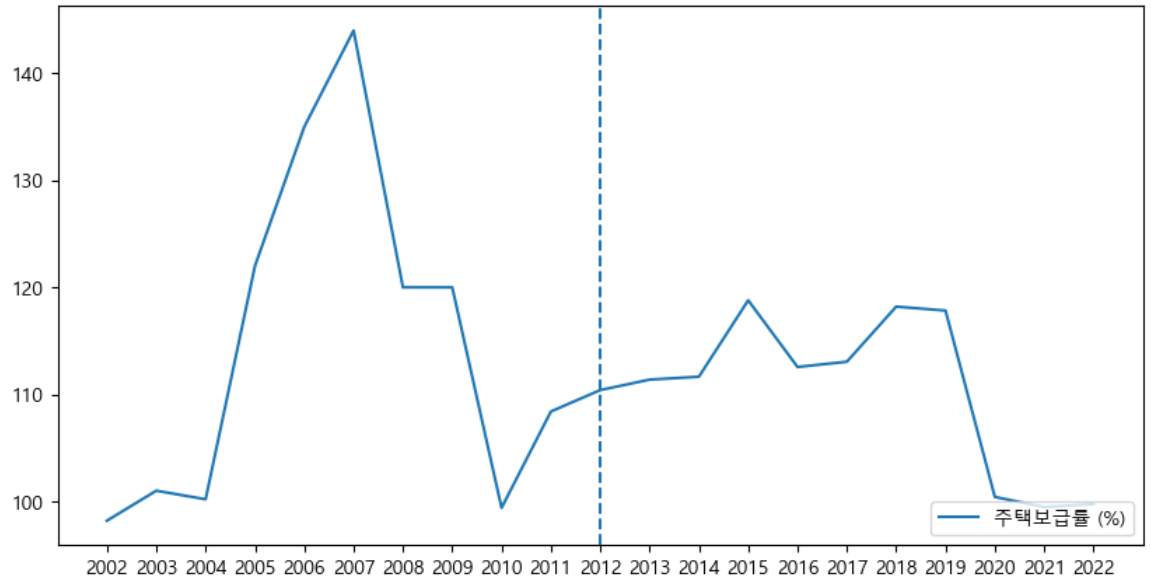 


  - 나주시 분석 결    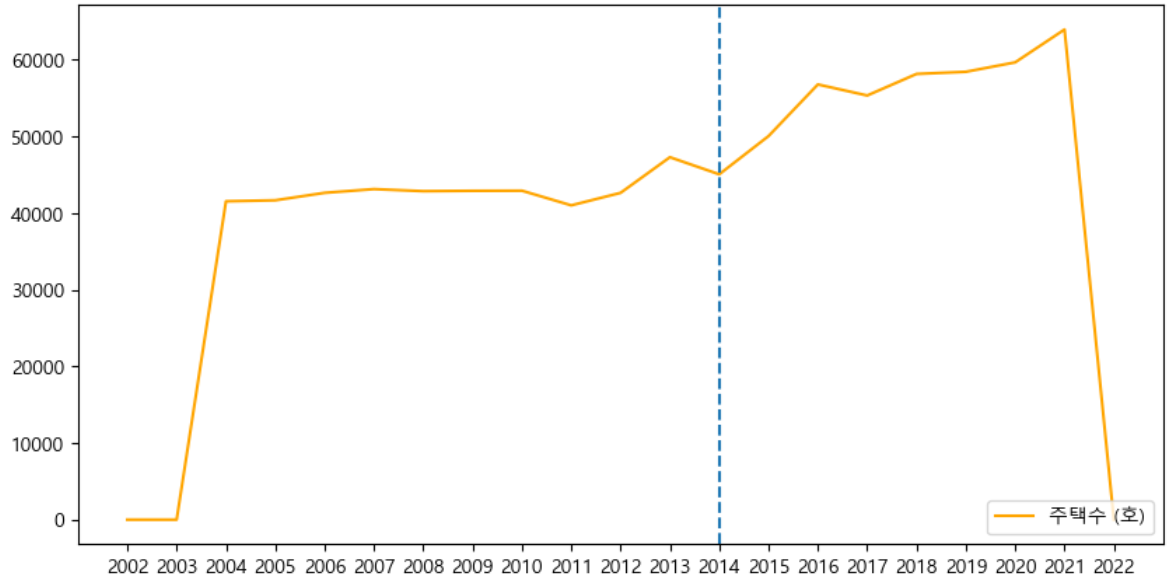
    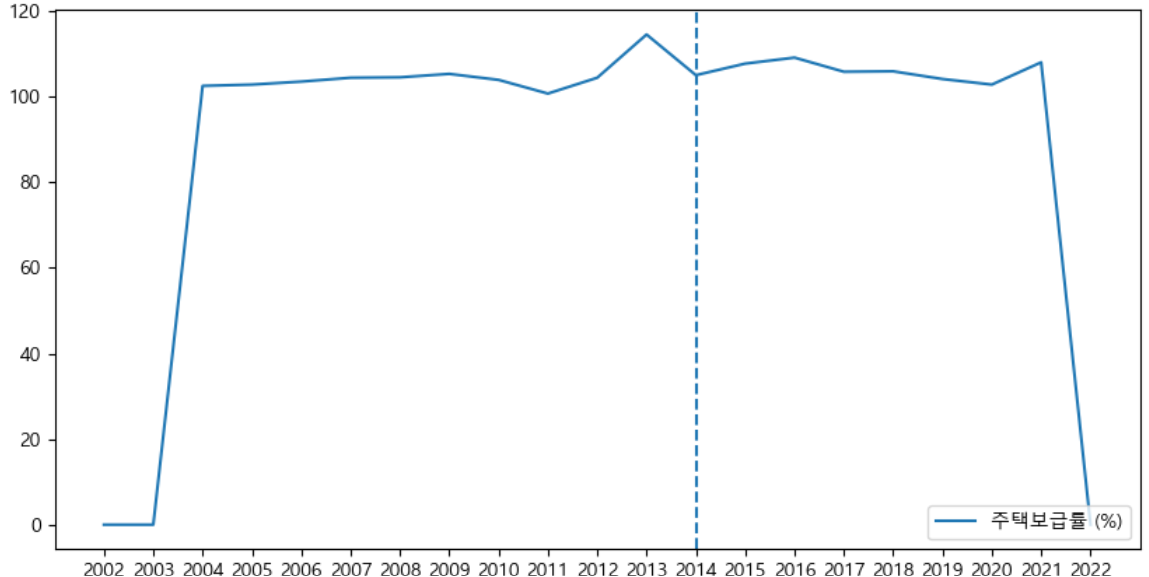


  - **결론2 도출**  
    대기업의 지방이전 시기 2012년 ~ 2014년을 기준으로 나주시/충주시/서산시의 인구수 증가에 따라 주택수/주택보급률 지표가 상승함.  
    반면에, 서산시의 경우 인구가 소폭 감소하던 2005년 시기에 주택보급률이 크게 상승함.  
    지방이 이전한 이후에 두 그래프 모두 우상향을 그리고 있지만, 전 시점에서 그래프가 하향.  
    대기업의 지방이전이 인구수 증가와 주택보급/주택수에 무조건적인 영향이 있지 않다고 판단됨.    